In [180]:
import pandas as pd
import numpy as np
import folium
import folium.plugins as plugins

## Wczytanie i porządkowanie danych

In [201]:
df = pd.read_csv('./data/DataWorkshop.csv')

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229929 entries, 0 to 229928
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   GPS x                              229929 non-null  float32       
 1   GPS y                              229929 non-null  float32       
 2   Miejscowość                        229929 non-null  object        
 3   Ulica                              209201 non-null  object        
 4   Numer domu                         136045 non-null  object        
 5   Numer drogi                        229929 non-null  object        
 6   KM HM (Pikietaż)                   35041 non-null   object        
 7   Obszar                             229928 non-null  object        
 8   Skrzyżowanie                       63150 non-null   object        
 9   Geometria drogi                    163921 non-null  object        
 10  Charakterystyka miej

In [184]:
#df['Data zdarzenia'] = pd.to_datetime(df['Data zdarzenia']) 
#df['Godzina'] = pd.to_datetime(df['Godzina'])

df['Data'] = df['Data zdarzenia'] + ' '+ df['Godzina']
df['Data'] = pd.to_datetime(df['Data'])

del df['Data zdarzenia']
del df['Godzina']

In [175]:
df['Data'].sample(3)

93807    2017-09-27 10:00:00
212810   2019-09-27 19:25:00
132999   2018-05-26 18:05:00
Name: Data, dtype: datetime64[ns]

In [192]:
df.head(5)

,GPS x,GPS y,Miejscowość,Ulica,Numer domu,Numer drogi,KM HM (Pikietaż),Obszar,Skrzyżowanie,Geometria drogi,...,Oznakowanie poziome,Liczba pasów w zdarzeniu,Zachowanie kierującego,Zachowanie pieszego,Inne przyczyny,Liczba rannych w zdarzeniu,Liczba zabitych w zdarzeniu,Liczba kolizji,Liczba wypadków,Data
0,18.635805,50.369720,GLIWICE,TOSZECKA,NaN,901,"61,6",Obszar niezabudowany,NaN,Odcinek prosty,...,Jest,2.0,NaN,NaN,"Obiekty, zwierzęta na drodze",0,0,1,0,2016-01-01 05:15:00
1,19.180834,50.323082,DĄBROWA GÓRNICZA,SIENKIEWICZA,NaN,G200 030S,NaN,Obszar zabudowany,Z drogą z pierwsz.,NaN,...,Jest,NaN,Nieprawidłowe: cofanie,NaN,NaN,0,0,1,0,2016-01-01 00:05:00
2,18.877640,50.445084,TARNOWSKIE GÓRY,KS.IGNACEGO SIWCA,4A,GMINNA,NaN,Obszar zabudowany,NaN,"Zakręt, łuk",...,Nie ma,2.0,Nieprawidłowe: omijanie,NaN,NaN,0,0,1,0,2016-01-01 18:30:00
3,18.860584,50.444668,TARNOWSKIE GÓRY,JÓZEFA PIŁSUDSKIEGO,6,P3276S,NaN,Obszar zabudowany,NaN,Odcinek prosty,...,Jest,2.0,Nieprawidłowe: omijanie,NaN,NaN,0,0,1,0,2016-01-01 15:10:00
4,19.047556,50.466805,OŻAROWICE,DWORCOWA,16,P3203S,NaN,Obszar zabudowany,NaN,Odcinek prosty,...,Nie ma,2.0,NaN,NaN,"Obiekty, zwierzęta na drodze",0,0,1,0,2016-01-01 17:45:00


In [186]:
feats = ['Skrzyżowanie', 'Geometria drogi', 'Charakterystyka miejsca zdarzenia',
       'Oświetlenie', 'Warunki atmosferyczne', 'Rodzaj zdarzenia', 'Wina',
       'Rodzaj drogi', 'Nawierzchnia drogi', 'Stan nawierzchni',
       'Sygnalizacja świetlna', 'Oznakowanie poziome',
       'Liczba pasów w zdarzeniu', 'Zachowanie kierującego',
       'Zachowanie pieszego', 'Inne przyczyny', 'Liczba rannych w zdarzeniu',
       'Liczba zabitych w zdarzeniu', 'Liczba kolizji', 'Liczba wypadków']
df[feats].sample(3)

,Skrzyżowanie,Geometria drogi,Charakterystyka miejsca zdarzenia,Oświetlenie,Warunki atmosferyczne,Rodzaj zdarzenia,Wina,Rodzaj drogi,Nawierzchnia drogi,Stan nawierzchni,Sygnalizacja świetlna,Oznakowanie poziome,Liczba pasów w zdarzeniu,Zachowanie kierującego,Zachowanie pieszego,Inne przyczyny,Liczba rannych w zdarzeniu,Liczba zabitych w zdarzeniu,Liczba kolizji,Liczba wypadków
176524,NaN,"Zakręt, łuk",Pobocze,Noc - droga oświetlona,Dobre warunki atmosferyczne,"Najechanie na słup, znak",z winy kierującego,Jednojezdniowa dwukierunkowa,Twarda,Sucha,Brak,Jest,2.0,Niedostosowanie prędkości do warunków ruchu,NaN,NaN,0,0,1,0
173645,NaN,Odcinek prosty,"Parking, plac, MOP",Światło dzienne,Dobre warunki atmosferyczne,Zderzenie pojazdów tylne,z winy kierującego,Jednojezdniowa dwukierunkowa,Twarda,Mokra,Brak,Jest,2.0,Nieprawidłowe cofanie,NaN,NaN,0,0,1,0
79102,NaN,"Zakręt, łuk",Pobocze,Światło dzienne,Dobre warunki atmosferyczne,"Najechanie na słup, znak",z winy kierującego,Jednojezdniowa dwukierunkowa,Twarda,Mokra,Brak,Jest,2.0,Inne przyczyny,NaN,NaN,0,1,0,1


In [200]:
##Porządki
df['Skrzyżowanie'].unique()
df['Geometria drogi'].unique()
df['Charakterystyka miejsca zdarzenia'].unique()
df['Oświetlenie'].unique()
df['Warunki atmosferyczne'].unique()

array(['Dobre warunki atmosferyczne', 'Pochmurno', 'Mgła, dym',
       'Oślepiające słońce', 'Opady śniegu, gradu',
       'Pochmurno; Opady śniegu, gradu', 'Opady deszczu',
       'Opady deszczu; Opady śniegu, gradu', 'Pochmurno; Opady deszczu',
       'Pochmurno; Mgła, dym', 'Pochmurno; Opady deszczu; Mgła, dym',
       'Opady deszczu; Mgła, dym',
       'Pochmurno; Opady deszczu; Opady śniegu, gradu',
       'Silny wiatr; Pochmurno; Opady śniegu, gradu',
       'Pochmurno; Opady śniegu, gradu; Mgła, dym',
       'Opady śniegu, gradu; Mgła, dym', 'Silny wiatr',
       'Silny wiatr; Opady deszczu', 'Silny wiatr; Pochmurno',
       'Silny wiatr; Opady śniegu, gradu',
       'Oślepiające słońce; Silny wiatr',
       'Silny wiatr; Pochmurno; Opady deszczu',
       'Oślepiające słońce; Opady deszczu', nan,
       'Silny wiatr; Opady deszczu; Opady śniegu, gradu',
       'Silny wiatr; Pochmurno; Opady deszczu; Opady śniegu, gradu',
       'Opady deszczu; Opady śniegu, gradu; Mgła, dym'], d

In [187]:
import re

# https://stackoverflow.com/questions/33997361
def dms2dd(coord):
    """ GPS HH.MM.SS.S to DD (Decimal Degrees) conversion """
    c = re.findall(r"\w+", coord)
    degrees = float(c[0])
    minutes = float(c[1])
    if len(c) > 2:
        seconds = float(c[2])/10   
    else:
        seconds = 0
    
    dd = float(degrees) + (minutes)/60 + float(seconds)/(60*60)
    
    #if direction == 'E' or direction == 'N':
    #    dd *= -1
    return dd

df['GPS x'] = df['GPS x'].apply(lambda x : dms2dd(x)) # N
df['GPS y'] = df['GPS y'].apply(lambda x : dms2dd(x))

In [188]:
#df['Data zdarzenia'] = pd.to_datetime(df['Data zdarzenia']) 
#df['Godzina'] = pd.to_datetime(df['Godzina']) 


df['GPS x'] = pd.to_numeric(df['GPS x'], downcast='float')
df['GPS y'] = pd.to_numeric(df['GPS y'], downcast='float')
df['Liczba rannych w zdarzeniu'] = pd.to_numeric(df['Liczba rannych w zdarzeniu'], downcast='unsigned')
df['Liczba zabitych w zdarzeniu'] = pd.to_numeric(df['Liczba zabitych w zdarzeniu'], downcast='unsigned')
df['Liczba kolizji'] = pd.to_numeric(df['Liczba kolizji'], downcast='unsigned')
df['Liczba wypadków'] = pd.to_numeric(df['Liczba wypadków'], downcast='unsigned')

In [37]:
# df['Zachowanie kierującego'].unique()

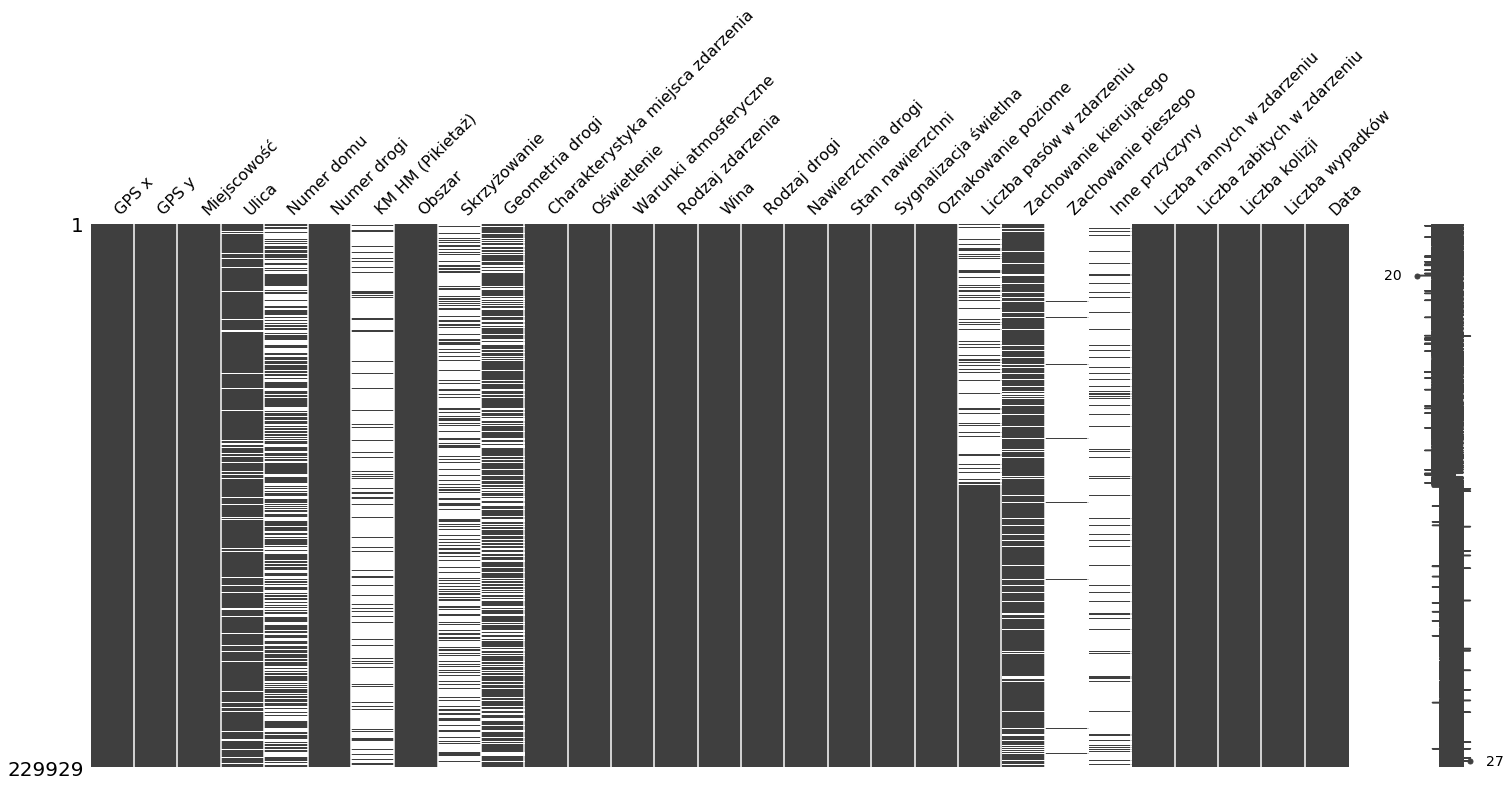

In [194]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [202]:
def check_missing():
    for column in df.columns:
        missing = column, df[column].isnull().sum()
        if missing[1] == 0: continue

        print(missing)
        
check_missing()

('Ulica', 20728)
('Numer domu', 93884)
('KM HM (Pikietaż)', 194888)
('Obszar', 1)
('Skrzyżowanie', 166779)
('Geometria drogi', 66008)
('Charakterystyka miejsca zdarzenia', 2)
('Warunki atmosferyczne', 1)
('Rodzaj drogi', 1)
('Nawierzchnia drogi', 1)
('Stan nawierzchni', 1)
('Oznakowanie poziome', 2)
('Liczba pasów w zdarzeniu', 88154)
('Zachowanie kierującego', 27901)
('Zachowanie pieszego', 227444)
('Inne przyczyny', 203726)


In [193]:
df.fillna(-1)

,GPS x,GPS y,Miejscowość,Ulica,Numer domu,Numer drogi,KM HM (Pikietaż),Obszar,Skrzyżowanie,Geometria drogi,...,Oznakowanie poziome,Liczba pasów w zdarzeniu,Zachowanie kierującego,Zachowanie pieszego,Inne przyczyny,Liczba rannych w zdarzeniu,Liczba zabitych w zdarzeniu,Liczba kolizji,Liczba wypadków,Data
0,18.635805,50.369720,GLIWICE,TOSZECKA,-1,901,"61,6",Obszar niezabudowany,-1,Odcinek prosty,...,Jest,2.0,-1,-1,"Obiekty, zwierzęta na drodze",0,0,1,0,2016-01-01 05:15:00
1,19.180834,50.323082,DĄBROWA GÓRNICZA,SIENKIEWICZA,-1,G200 030S,-1,Obszar zabudowany,Z drogą z pierwsz.,-1,...,Jest,-1.0,Nieprawidłowe: cofanie,-1,-1,0,0,1,0,2016-01-01 00:05:00
2,18.877640,50.445084,TARNOWSKIE GÓRY,KS.IGNACEGO SIWCA,4A,GMINNA,-1,Obszar zabudowany,-1,"Zakręt, łuk",...,Nie ma,2.0,Nieprawidłowe: omijanie,-1,-1,0,0,1,0,2016-01-01 18:30:00
3,18.860584,50.444668,TARNOWSKIE GÓRY,JÓZEFA PIŁSUDSKIEGO,6,P3276S,-1,Obszar zabudowany,-1,Odcinek prosty,...,Jest,2.0,Nieprawidłowe: omijanie,-1,-1,0,0,1,0,2016-01-01 15:10:00
4,19.047556,50.466805,OŻAROWICE,DWORCOWA,16,P3203S,-1,Obszar zabudowany,-1,Odcinek prosty,...,Nie ma,2.0,-1,-1,"Obiekty, zwierzęta na drodze",0,0,1,0,2016-01-01 17:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229924,19.187805,50.303307,SOSNOWIEC,BRACI MIEROSZEWSKICH,-1,P7605S,-1,Obszar zabudowany,-1,Odcinek prosty,...,Jest,4.0,Nieprawidłowe zmienianie pasa ruchu,-1,-1,0,0,1,0,2019-12-10 10:30:00
229925,19.110971,49.925804,DANKOWICE,OŚWIĘCIMSKA,-1,P4444S,-1,Obszar zabudowany,O ruchu okrężnym,-1,...,Jest,1.0,Nieprzestrzeganie znaków i innych sygnałów,-1,-1,1,0,0,1,2019-11-20 02:00:00
229926,19.181168,50.290306,SOSNOWIEC,BRACI MIEROSZEWSKICH,-1,P7605S,-1,Obszar zabudowany,Z drogą z pierwsz.,-1,...,Jest,2.0,Nieprawidłowe wyprzedzanie,-1,-1,0,0,1,0,2019-11-24 14:30:00
229927,18.765638,49.887722,ZABŁOCIE,SKRAJNA,5,G611078S,-1,Obszar zabudowany,-1,Odcinek prosty,...,Nie ma,2.0,-1,-1,Nieustalone,0,0,1,0,2019-12-04 10:50:00


# Folium

In [191]:
#19*00'551 (E) 	50*16'127 (N) 	KATOWICE 	JANA NEPOMUCENA STĘŚLICKIEGO

m = folium.Map(
    location=[50.36972222222222, 18.635805555555557],
    zoom_start=12,
    tiles='Stamen Terrain'
)

tooltip = 'Click me!'

folium.Marker([50.36972222222222, 18.635805555555557], popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
#folium.Marker([45.3311, -121.7113], popup='<b>Timberline Lodge</b>', tooltip=tooltip).add_to(m)

m

